### Lab work #2. Metric classification

#### Importing libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, accuracy_score
from datetime import datetime as time

#### reading the dataset (https://www.kaggle.com/datasets/gkalpolukcu/knn-algorithm-dataset)

In [2]:
data = pd.read_csv('data/KNNAlgorithmDataset.csv',delimiter=',')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


#### Checking the dataset for missing values as well as datatypes

In [3]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [4]:
data.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

#### Checking the dataset for distribution of the target classes

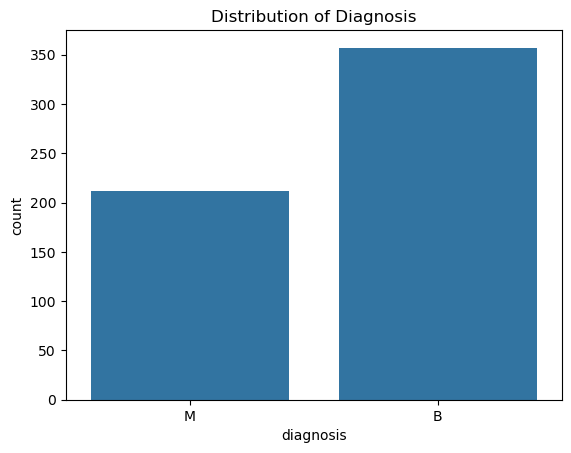

In [5]:
#Distribution of the target variable
sns.countplot(x='diagnosis', data=data)
plt.title('Distribution of Diagnosis')
plt.show()

##### The dataset is fairly evenly balanced.

#### Visualizing the data

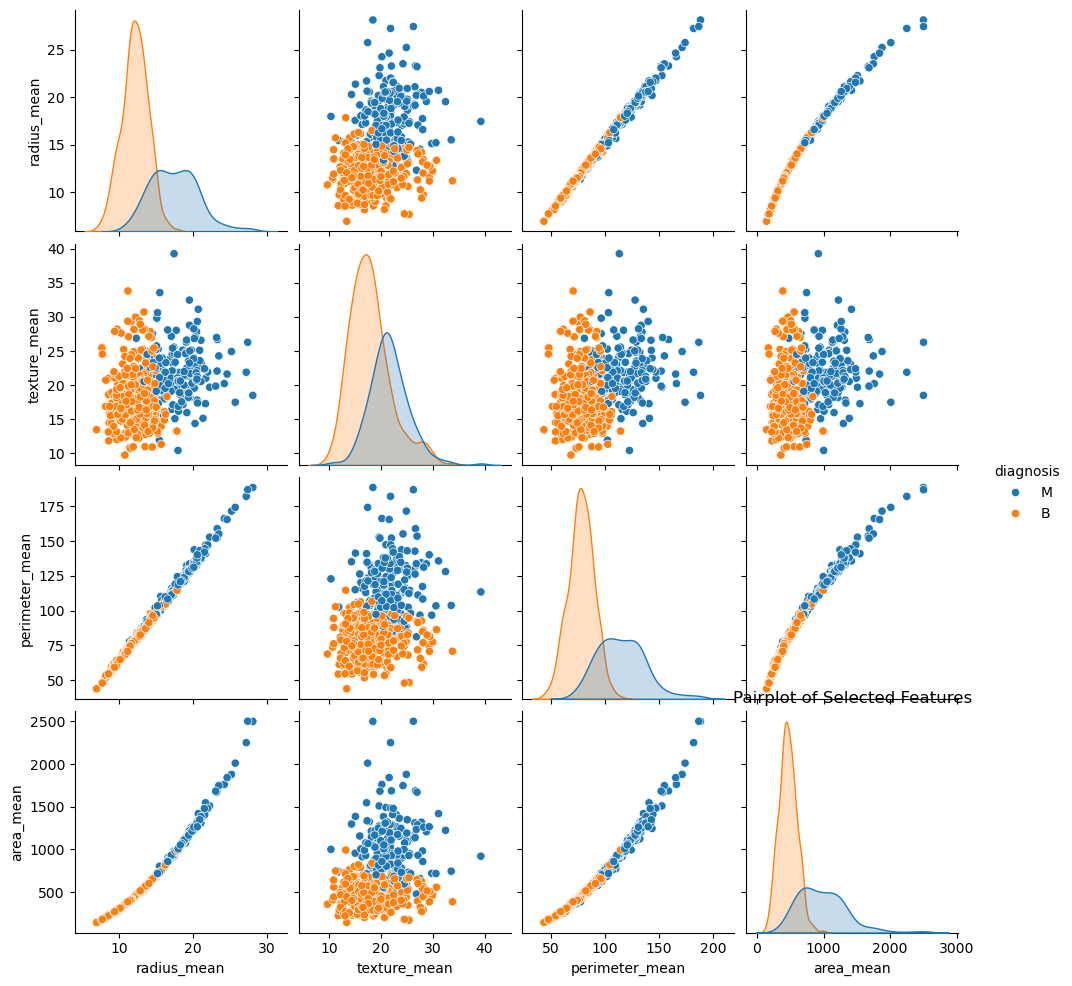

In [6]:
# Pairplot to visualize relationships between features
sns.pairplot(data, hue='diagnosis', vars=['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean'])
plt.title('Pairplot of Selected Features')
plt.show()

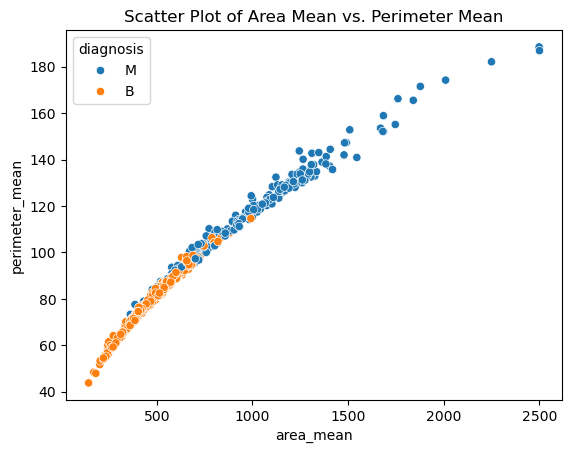

In [7]:
sns.scatterplot(x='area_mean', y='perimeter_mean', hue='diagnosis', data=data)
plt.title('Scatter Plot of Area Mean vs. Perimeter Mean')
plt.show()

Dropping 'id' column because it doesn't influence the data. Dropping 'Unnamed: 32' because it is filled with 'NaN'.

In [8]:
data = data.drop(columns=['id','Unnamed: 32'])

Assigning the targets to 'y' and the features to 'X'. Since the values of 'y' are 'B' or 'M', let's encode them to numeric values.

In [9]:
# Splitting the dataset into features and target
X = data.drop(columns=['diagnosis'])
y = data['diagnosis']
y = LabelEncoder().fit_transform(y)

Using 'StandardScaler' to scale the values of 'X'

In [10]:
X = StandardScaler().fit_transform(X)


Splitting the dataset into test and training sets. 80% training and 20% test.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### Library KNN classifier for reference

Note: k is chosen through the sliding control (LOO) method. The Function is implemented at the end. k = 9 is chosen out of 30.

In [12]:
# measuring speed and accuracy metrics for reference KNN.
start = time.now()
knn = KNeighborsClassifier(n_neighbors= 9)
knn.fit(X_train, y_train)

pred = knn.predict(X_test)

end = time.now()

print('Library KNN')
print(f"{len(X_test)} samples in {(end - start).microseconds/1000:.3f} ms")
print("Accuracy:", accuracy_score(y_test, pred))
print("Classification Report:\n", classification_report(y_test, pred))

Library KNN
114 samples in 256.520 ms
Accuracy: 0.9649122807017544
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



Confusion matrix based on the predictions of the reference library.

<Axes: >

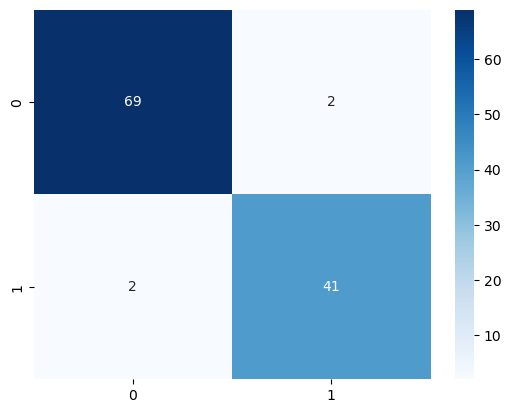

In [13]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,pred)
sns.heatmap(cm,annot=True,cmap="Blues")

#### Custom KNN

Takes number of neighbours (k) and mode of the Parzen window method ('parzen_variable', 'parzen_fixed' and 'simple') as arguements. The source code is located in [knn.py](knn.py). Gaussian Kernel is the kernel used.

In [14]:
from knn import my_KNN

#measuring speed and accuracy metrics on the custom implementation.
start = time.now()
knn = my_KNN(neighbours= 9,mode='parzen_variable')
knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)

end = time.now()

print('Implemented KNN')
print(f"{len(X_test)} samples in {(end - start).microseconds/1000:.3f} ms")
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test,y_pred))



Implemented KNN
114 samples in 6.886 ms
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

0.9649122807017544


Confusion matrix based on the predictions of the implementation.

<Axes: >

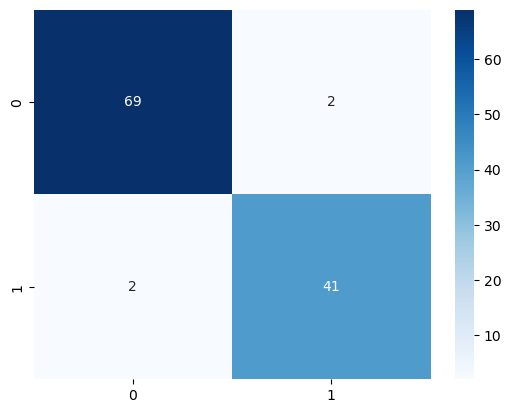

In [15]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,cmap="Blues")

#### Sliding Control Method (LOO)

In [16]:
def loo_k(k, X, y):
    knn = my_KNN(neighbours= k, mode= 'parzen_variable')
    y_pred = np.empty(y.shape, dtype=np.int32)
    for i in range(len(X)):
        knn.fit(np.delete(X, i, axis=0),np.delete(y, i))
        y_pred[i] = knn.predict_single(X[i])
    return np.sum(y_pred != y) / len(y)

##### Selection of Parameters for LOO method

<p> Minimum Bound for k: 1 </p>
<p> Maximum Bound for k: sqrt(n_samples) = sqrt(546) ~ 23 rounded up to 30 </p>
<p> Since our range is small the step will be 1

In [24]:
kList = np.arange(1,30)
LOO_K = np.empty(kList.shape)
for j,k in enumerate(kList):
    LOO_K[j] = loo_k(k,X_train,y_train)

##### Plotting Emperical Risk

Text(0.5, 1.0, 'Leave One Out Method')

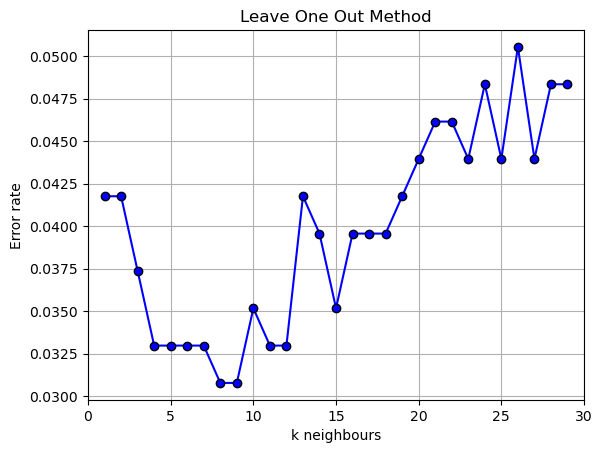

In [25]:
plt.plot(kList, LOO_K, 'b-o', markersize=6, markeredgecolor='k')
plt.xlim(0, 30)
plt.grid("on")
plt.ylabel("Error rate")
plt.xlabel("k neighbours")
plt.title("Leave One Out Method")


Based on the results of the Emperical Risk plot, we can see that best result is optained when k=8 or k=9. The Error rate for those values is the lowest.

#### Testing Speed on a random test value

In [19]:
import time
# checking performance for a random test value
x = X_test[100]

# init custom KNN
knn2 = my_KNN(neighbours= 9, mode='parzen_variable')
knn2. fit(X_train,y_train)

#init reference KNN
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,y_train)

# run custom KNN
start1 = time.perf_counter()
pred_1 = knn2.predict_single(x)
end1 = time.perf_counter()

e_imp = (end1 - start1)*1000

#run reference KNN
start2 = time.perf_counter()
pred_2 = knn.predict(x.reshape((1,-1)))
end2 = time.perf_counter()

e_ref = (end2 - start2)*1000

print(f'Implemented KNN prediction: {pred_1} | Reference KNN prediction: {pred_2[0]}')
print(f'Elapsed Time: for Implemented KNN: {e_imp}s | for Reference KNN: {e_ref}s')


Implemented KNN prediction: 1 | Reference KNN prediction: 1
Elapsed Time: for Implemented KNN: 0.8851999882608652s | for Reference KNN: 34.97320000315085s


#### The implemented KNN outperforms the refernce KNN on speed both on the complete test set and a random chosen test value. They both have the same accuracy score across all metrics (F1, Recall and Accuracy). But, for a large dataset the reference KNN will be much better as it will be able to handle the volume.